## BRAIN TUMOR DETECTION WITH TENSORFLOW (COMPARISION BETWEEN FNN AND CNN)

# R.ANANDHA RAGAVEN
# CSE - A

## FEED FORWARD NEURAL NETWORK

In [ ]:
from zipfile import ZipFile
file_name = "brain-tumor .zip"

with  ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

In [ ]:
#Load libraries
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import torch
import glob
import pathlib

In [ ]:
#checking for device
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
print(device)

cuda


In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/brain-tumor /train") 
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) 
class_names = class_names[1:]
print(class_names)

['Brain Tumor' 'Healthy']


In [ ]:
# Let's visuvalize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape  of the img

  return img

Image shape: (359, 297, 3)


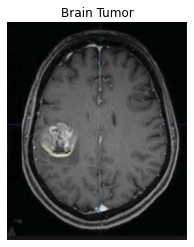

In [ ]:
img = view_random_image(target_dir="brain-tumor /train/",
                        target_class="Brain Tumor")

Image shape: (225, 225, 3)


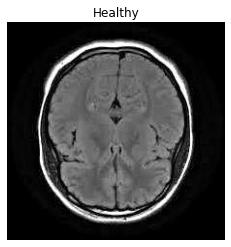

In [ ]:
img = view_random_image(target_dir="brain-tumor /train/",
                        target_class="Healthy")

In [ ]:
img



array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
img.shape

(225, 225, 3)

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:


# Create ImageDataGenerator training instance with data augmentation (horizontal flip is True)
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   horizontal_flip=True) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)



train_dir = "brain-tumor /train/"
test_dir = "brain-tumor /test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(150, 150), # convert all images to be 150 x 150
                                               class_mode="binary", # type of problem we're working on (binary class classification predict whether it is Healthy or Cancer)
                                               seed=42)

valid_data= test_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(150, 150),
                                               class_mode="binary",
                                               seed=42)


Found 4350 images belonging to 2 classes.
Found 242 images belonging to 2 classes.


### TRYING DIFFERENT OPTIMIZER

### SGD

In [ ]:

tf.random.set_seed(42)


model_a = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(150, 150, 3)), 
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_a.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# Fit the model
history_a = model_a.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
136/136 [==============================] - 14s 101ms/step - loss: 0.6958 - accuracy: 0.5416 - val_loss: 0.6928 - val_accuracy: 0.5124
Epoch 2/5
136/136 [==============================] - 14s 99ms/step - loss: 0.6904 - accuracy: 0.5483 - val_loss: 0.6931 - val_accuracy: 0.5124
Epoch 3/5
136/136 [==============================] - 13s 98ms/step - loss: 0.6895 - accuracy: 0.5483 - val_loss: 0.6935 - val_accuracy: 0.5124
Epoch 4/5
136/136 [==============================] - 14s 100ms/step - loss: 0.6890 - accuracy: 0.5483 - val_loss: 0.6939 - val_accuracy: 0.5124
Epoch 5/5
136/136 [==============================] - 13s 99ms/step - loss: 0.6888 - accuracy: 0.5483 - val_loss: 0.6943 - val_accuracy: 0.5124


### ADAM

In [ ]:

tf.random.set_seed(42)


model_b = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(150, 150, 3)), 
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])


model_b.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])


history_b = model_b.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
136/136 [==============================] - 14s 101ms/step - loss: 0.6989 - accuracy: 0.5402 - val_loss: 0.6904 - val_accuracy: 0.5124
Epoch 2/5
136/136 [==============================] - 13s 99ms/step - loss: 0.6888 - accuracy: 0.5483 - val_loss: 0.6913 - val_accuracy: 0.5124
Epoch 3/5
136/136 [==============================] - 13s 99ms/step - loss: 0.6883 - accuracy: 0.5483 - val_loss: 0.6920 - val_accuracy: 0.5124
Epoch 4/5
136/136 [==============================] - 13s 98ms/step - loss: 0.6896 - accuracy: 0.5483 - val_loss: 0.6950 - val_accuracy: 0.5124
Epoch 5/5
136/136 [==============================] - 13s 99ms/step - loss: 0.6885 - accuracy: 0.5483 - val_loss: 0.6954 - val_accuracy: 0.5124


### INCREASING THE HIDDEN LAYER

In [ ]:

tf.random.set_seed(42)


model_c = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(150 , 150, 3)), 
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])


model_c.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])


history_c = model_c.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, 
                        validation_steps=len(valid_data))

Epoch 1/5
136/136 [==============================] - 14s 101ms/step - loss: 0.6412 - accuracy: 0.6446 - val_loss: 0.5571 - val_accuracy: 0.7810
Epoch 2/5
136/136 [==============================] - 13s 99ms/step - loss: 0.5308 - accuracy: 0.7671 - val_loss: 0.5313 - val_accuracy: 0.8058
Epoch 3/5
136/136 [==============================] - 14s 100ms/step - loss: 0.4460 - accuracy: 0.8129 - val_loss: 0.4655 - val_accuracy: 0.8264
Epoch 4/5
136/136 [==============================] - 14s 99ms/step - loss: 0.4077 - accuracy: 0.8345 - val_loss: 0.6938 - val_accuracy: 0.7562
Epoch 5/5
136/136 [==============================] - 13s 99ms/step - loss: 0.4028 - accuracy: 0.8352 - val_loss: 0.4632 - val_accuracy: 0.8430


# Increasing epoch

In [ ]:

tf.random.set_seed(42)


model_d = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(150, 150, 3)), 
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])


model_d.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])


history_d = model_d.fit(train_data, 
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, 
                        validation_steps=len(valid_data))

Epoch 1/10
136/136 [==============================] - 14s 100ms/step - loss: 0.6558 - accuracy: 0.6292 - val_loss: 0.6364 - val_accuracy: 0.6777
Epoch 2/10
136/136 [==============================] - 13s 99ms/step - loss: 0.5737 - accuracy: 0.7474 - val_loss: 0.5476 - val_accuracy: 0.7893
Epoch 3/10
136/136 [==============================] - 13s 99ms/step - loss: 0.5861 - accuracy: 0.7216 - val_loss: 0.5407 - val_accuracy: 0.7769
Epoch 4/10
136/136 [==============================] - 13s 99ms/step - loss: 0.4819 - accuracy: 0.8021 - val_loss: 0.4764 - val_accuracy: 0.7686
Epoch 5/10
136/136 [==============================] - 13s 99ms/step - loss: 0.4339 - accuracy: 0.8218 - val_loss: 0.5056 - val_accuracy: 0.7810
Epoch 6/10
136/136 [==============================] - 13s 99ms/step - loss: 0.4267 - accuracy: 0.8230 - val_loss: 0.4172 - val_accuracy: 0.8099
Epoch 7/10
136/136 [==============================] - 14s 99ms/step - loss: 0.4284 - accuracy: 0.8280 - val_loss: 0.4238 - val_accuracy

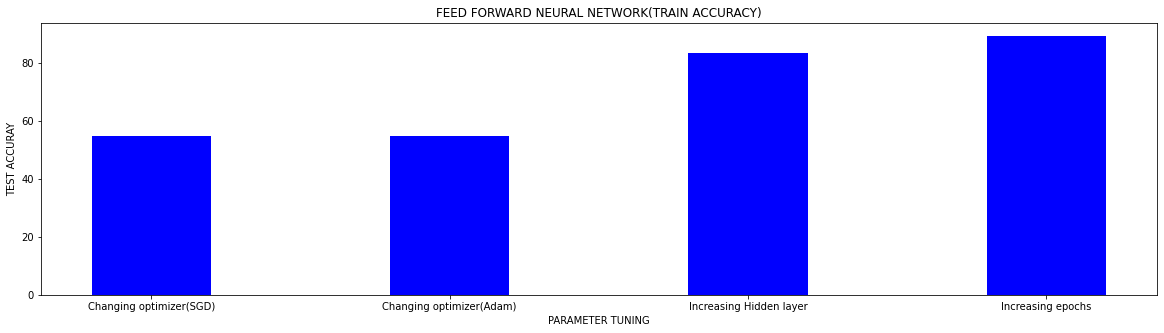

In [ ]:
# creating the dataset
data = {'Changing optimizer(SGD)':54.83, 'Changing optimizer(Adam)':54.83, 'Increasing Hidden layer':83.52,
        'Increasing epochs':89.33}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (20,5))
 
# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("PARAMETER TUNING")
plt.ylabel("TEST ACCURAY")
plt.title("FEED FORWARD NEURAL NETWORK(TRAIN ACCURACY)")
plt.show()

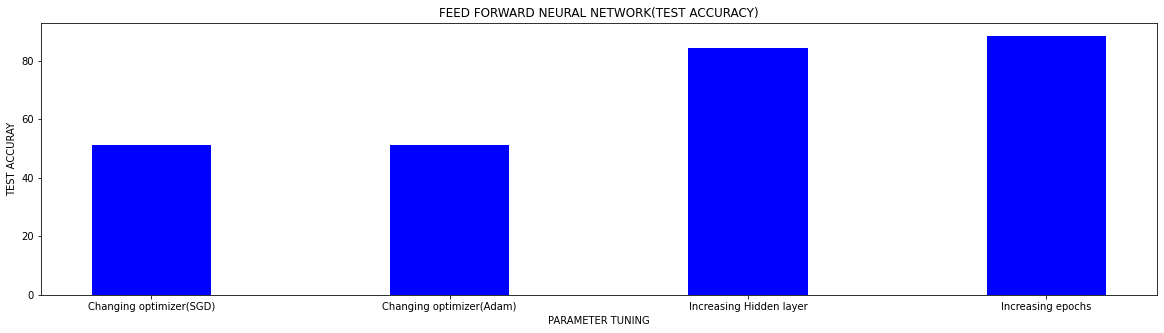

In [ ]:
# creating the dataset
data = {'Changing optimizer(SGD)':51.24, 'Changing optimizer(Adam)':51.24, 'Increasing Hidden layer':84.30,
        'Increasing epochs':88.43}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (20,5))
 
# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("PARAMETER TUNING")
plt.ylabel("TEST ACCURAY")
plt.title("FEED FORWARD NEURAL NETWORK(TEST ACCURACY)")
plt.show()

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

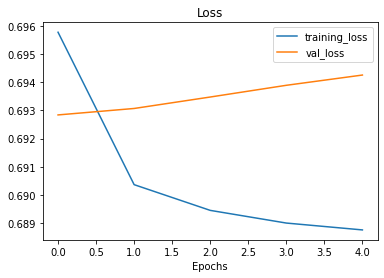

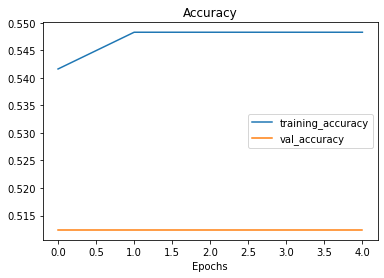

In [ ]:
plot_loss_curves(history_a)

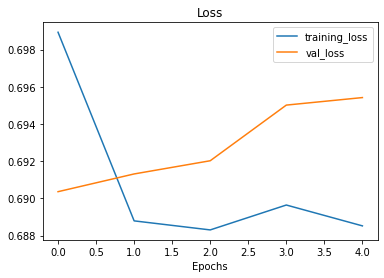

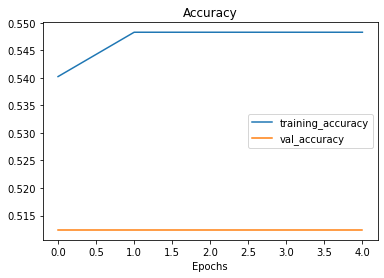

In [ ]:
plot_loss_curves(history_b)

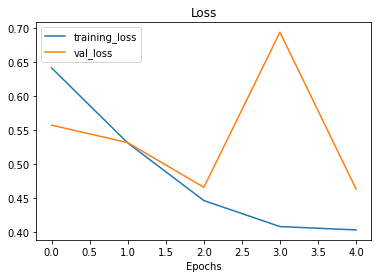

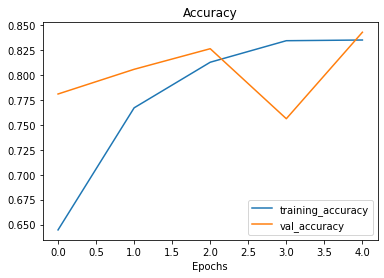

In [ ]:
plot_loss_curves(history_c)

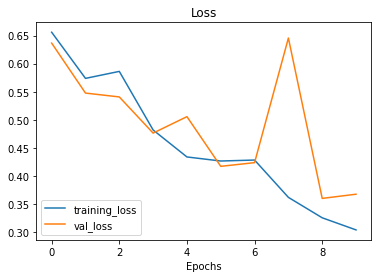

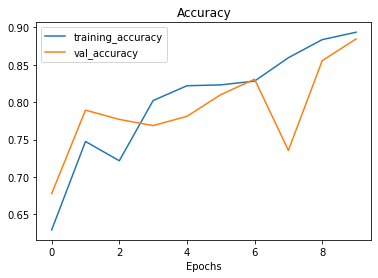

In [ ]:
plot_loss_curves(history_d)

## Increasing Hidden layer and epochs seems like it shown promising results - Test Accuracy of ~ 88%



## Changing the optimizer only gave an test accuracy around ~54%

## But let's look for CNN

## CNN

In [ ]:


model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(150, 150, 3)), # first layer specifies input shape (height, width, colour channels)


  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), 
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  
  tf.keras.layers.MaxPool2D(2),


  



  tf.keras.layers.Flatten(),


  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 4350 images belonging to 2 classes.
Found 242 images belonging to 2 classes.
Epoch 1/10
136/136 [==============================] - 17s 120ms/step - loss: 0.4986 - accuracy: 0.7538 - val_loss: 0.4208 - val_accuracy: 0.8099
Epoch 2/10
136/136 [==============================] - 16s 119ms/step - loss: 0.3139 - accuracy: 0.8678 - val_loss: 0.3240 - val_accuracy: 0.8678
Epoch 3/10
136/136 [==============================] - 16s 118ms/step - loss: 0.2034 - accuracy: 0.9237 - val_loss: 0.5066 - val_accuracy: 0.8223
Epoch 4/10
136/136 [==============================] - 16s 117ms/step - loss: 0.1588 - accuracy: 0.9400 - val_loss: 0.2892 - val_accuracy: 0.8884
Epoch 5/10
136/136 [==============================] - 16s 118ms/step - loss: 0.0990 - accuracy: 0.9678 - val_loss: 0.3500 - val_accuracy: 0.8760
Epoch 6/10
136/136 [==============================] - 16s 118ms/step - loss: 0.0734 - accuracy: 0.9759 - val_loss: 0.1623 - val_accuracy: 0.9504
Epoch 7/10
136/136 [===========================

In [ ]:
# Check out the layers in our model
model_1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 148, 148, 10)      280       
                                                                 
 conv2d_40 (Conv2D)          (None, 146, 146, 10)      910       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 73, 73, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 71, 71, 10)        910       
                                                                 
 conv2d_42 (Conv2D)          (None, 69, 69, 10)        910       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 34, 34, 10)       0         
 g2D)                                                 

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

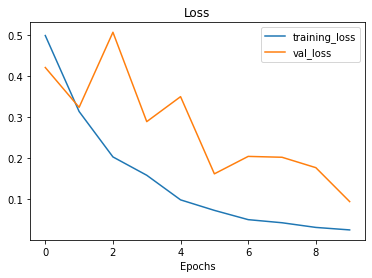

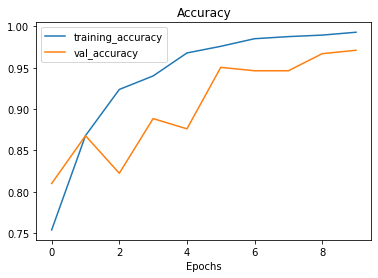

In [ ]:
# Check out the loss curves of model_1
plot_loss_curves(history_1)

In [ ]:
# Evaluate on the test data
model_1.evaluate(valid_data )

8/8 [==============================] - 1s 76ms/step - loss: 0.0948 - accuracy: 0.9711


[0.0948067158460617, 0.9710744023323059]

In [ ]:

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=150):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

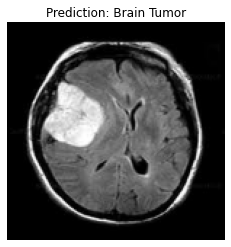

In [ ]:
# Test our model on a custom image
pred_and_plot(model_1, "/content/brain-tumor /pred/Cancer (2415).jpg", class_names)

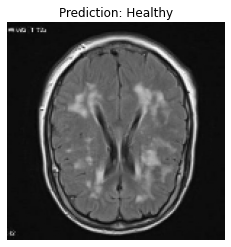

In [ ]:
pred_and_plot(model_1, "/content/brain-tumor /pred/Not Cancer  (2075).jpg", class_names)


# IT SEEMS THAT CNN HAS OUT PERFORMED FNN 
# ACCURACY
# FNN - ~88% (model_d)
# CNN-  ~97% (model_1)

